# Estatística Descritiva

Neste documento, ilustramos conceitos de estatísticas descritivas utilizando o conjunto de dados *Adult Income* da UCI. Abaixo, apresentamos exemplos em Python que cobrem os seguintes conceitos:
- média, 
- moda, 
- quantis, 
- variância
- desvio padrão.



In [18]:
# pip install pandas

In [19]:
# Descriptive Statistics Using the Adult Income Dataset

## 1. Loading the Dataset

import pandas as pd

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
           'marital_status', 'occupation', 'relationship', 'race', 
           'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 
           'native_country', 'income']

df = pd.read_csv(url, header=None, names=columns, na_values=' ?', skipinitialspace=True)

In [20]:
# Display the first few rows
print(df.head())

   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

## Média

A média é o valor médio de uma coluna numérica. Vamos calcular a média da idade dos indivíduos no conjunto de dados.

In [21]:
mean_age = df['age'].mean()
print(f"Mean age: {mean_age}")

Mean age: 38.58164675532078


## Mediana

A mediana é o valor central de um conjunto de dados ordenado. Vamos calcular a mediana das horas trabalhadas por semana pelos indivíduos.

In [22]:
median_hours_per_week = df['hours_per_week'].median()
print(f"Median hours per week: {median_hours_per_week}")

Median hours per week: 40.0



## Moda

A moda é o valor que aparece com mais frequência. Vamos encontrar a moda para a coluna \texttt{workclass}.

In [23]:
mode_workclass = df['workclass'].mode()[0]
print(f"Mode of workclass: {mode_workclass}")

Mode of workclass: Private


## Quantis

Quantis são pontos de corte que dividem o intervalo de um conjunto de dados em intervalos contínuos com probabilidades iguais. Vamos calcular os quartis (quantis 0,25; 0,5; 0,75) para a coluna `fnlwgt`.

In [24]:
quantiles_fnlwgt = df['fnlwgt'].quantile([0.25, 0.5, 0.75])
print("Quantiles for fnlwgt:")
print(quantiles_fnlwgt)


Quantiles for fnlwgt:
0.25    117827.0
0.50    178356.0
0.75    237051.0
Name: fnlwgt, dtype: float64



## Variância

A variância mede a dispersão dos pontos de dados em relação à média. Vamos calcular a variância da idade.

In [25]:

variance_age = df['age'].var()
print(f"Variance of age: {variance_age}")

Variance of age: 186.0614002488016



## Desvio Padrão

O desvio padrão é a raiz quadrada da variância, fornecendo uma medida da distância média de cada ponto de dados em relação à média. Vamos calcular o desvio padrão das horas trabalhadas por semana.

In [26]:
std_hours_per_week = df['hours_per_week'].std()
print(f"Standard deviation of hours per week: {std_hours_per_week}")

Standard deviation of hours per week: 12.347428681731843


## Intervalo Interquartil (IQR)

O intervalo interquartil (IQR) é a diferença entre o primeiro quartil (percentil 25) e o terceiro quartil (percentil 75). Ele pode ser calculado para qualquer coluna numérica. Aqui está como calculá-lo para \texttt{capital\_gain}.

In [27]:
Q1 = df['capital_gain'].quantile(0.25)
Q3 = df['capital_gain'].quantile(0.75)
IQR = Q3 - Q1
print(f"Interquartile Range (IQR) of capital gain: {IQR}")

Interquartile Range (IQR) of capital gain: 0.0


## Assimetria (Skewness)

Assimetria é uma medida que descreve a simetria de uma distribuição, ou mais especificamente, a falta de simetria. Ela indica se os dados estão inclinados para a direita ou para a esquerda da média. A assimetria pode ser:

- Assimetria Positiva: A cauda à direita da distribuição é mais longa ou mais estendida. A maioria dos valores está concentrada à esquerda da média, e há alguns valores muito altos que puxam a média para cima.

- Assimetria Negativa: A cauda à esquerda da distribuição é mais longa ou mais estendida. A maioria dos valores está concentrada à direita da média, e há alguns valores muito baixos que puxam a média para baixo.

- Simetria: Quando a distribuição é simétrica, ou seja, a cauda à direita e à esquerda são aproximadamente iguais. Neste caso, a assimetria é próxima de zero.

Vamos calcular a assimetria da variável `capital_gain`.

In [28]:

skewness_capital_gain = df['capital_gain'].skew()
print(f"Skewness of capital gain: {skewness_capital_gain}")

Skewness of capital gain: 11.953847687699799


Ao executar o código abaixo, você verá três gráficos:

- Distribuição Simétrica: Representa uma distribuição onde os dados são distribuídos igualmente ao redor da média, com uma assimetria próxima de zero.

- Distribuição com Assimetria Positiva: Mostra uma distribuição onde a cauda é mais longa à direita, indicando que há uma concentração maior de valores menores.

- Distribuição com Assimetria Negativa: Mostra uma distribuição onde a cauda é mais longa à esquerda, indicando que há uma concentração maior de valores maiores.

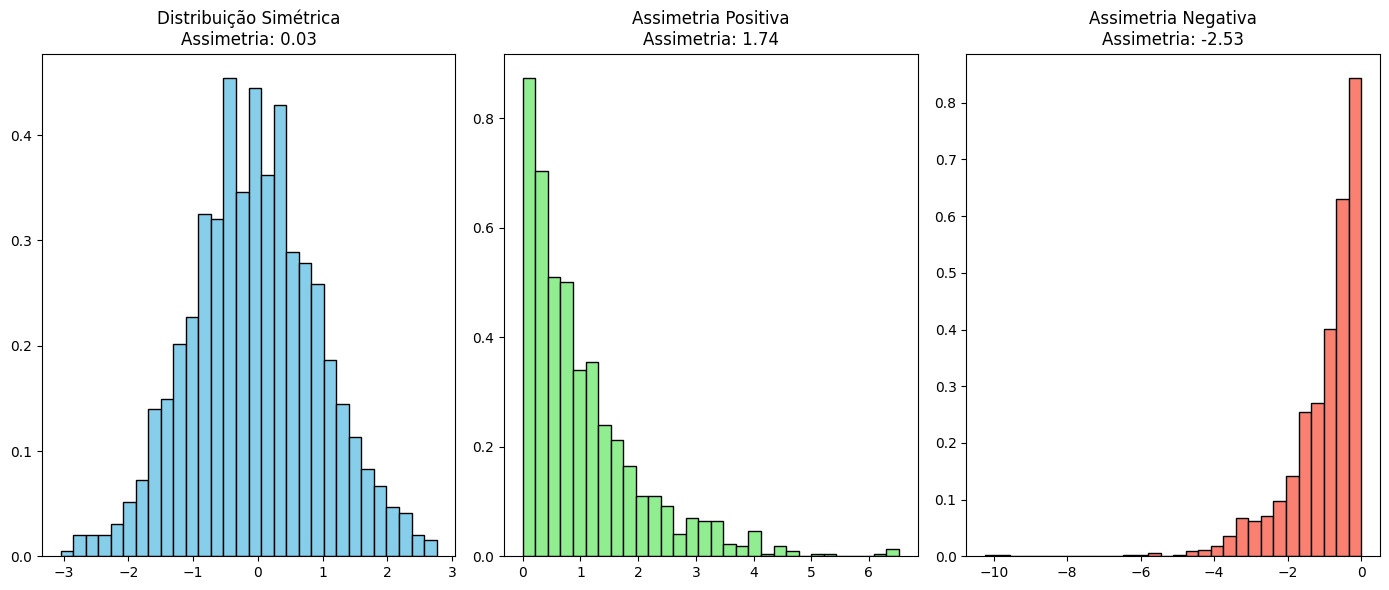

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

# Gerar dados de distribuições com diferentes níveis de assimetria
np.random.seed(0)
data_symmetric = np.random.normal(0, 1, 1000)  # Simétrica (assimetria ≈ 0)
data_positive_skew = np.random.exponential(1, 1000)  # Assimetria positiva
data_negative_skew = -np.random.exponential(1, 1000)  # Assimetria negativa

# Calcular assimetria
skew_symmetric = skew(data_symmetric)
skew_positive = skew(data_positive_skew)
skew_negative = skew(data_negative_skew)

# Plotar os gráficos
plt.figure(figsize=(14, 6))

# Gráfico da distribuição simétrica
plt.subplot(1, 3, 1)
plt.hist(data_symmetric, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title(f'Distribuição Simétrica\nAssimetria: {skew_symmetric:.2f}')

# Gráfico da distribuição com assimetria positiva
plt.subplot(1, 3, 2)
plt.hist(data_positive_skew, bins=30, color='lightgreen', edgecolor='black', density=True)
plt.title(f'Assimetria Positiva\nAssimetria: {skew_positive:.2f}')

# Gráfico da distribuição com assimetria negativa
plt.subplot(1, 3, 3)
plt.hist(data_negative_skew, bins=30, color='salmon', edgecolor='black', density=True)
plt.title(f'Assimetria Negativa\nAssimetria: {skew_negative:.2f}')

plt.tight_layout()
plt.show()


##  Curtose (Kurtosis)

Curtose é uma medida da "tailedness" (caudas) de uma distribuição, ou seja, da presença de outliers (valores extremos) em uma distribuição. Ela descreve a forma das caudas em relação à distribuição normal (que tem uma curtose de 0). A curtose é classificada em três tipos principais:

- Mesocúrtica: Distribuições com curtose próxima de 0, similar à distribuição normal.
- Leptocúrtica: Distribuições com caudas mais pesadas e um pico mais alto que a normal, indicando uma curtose positiva. Essas distribuições têm mais probabilidade de produzir valores extremos.
- Platicúrtica: Distribuições com caudas mais leves e um pico mais baixo que a normal, indicando uma curtose negativa. Essas distribuições têm menos probabilidade de produzir valores extremos.

Uma alta curtose em um conjunto de dados é um indicador de que os dados têm caudas longas ou outliers. 

Vamos calcular a curtose para `capital_loss`.

In [30]:
kurtosis_capital_loss = df['capital_loss'].kurtosis()
print(f"Kurtosis of capital loss: {kurtosis_capital_loss}")

Kurtosis of capital loss: 20.3768017134122


Ao executar este código, você verá três gráficos, cada um representando uma distribuição com um nível diferente de curtose. Isso ajuda a visualizar como a curtose afeta a forma da distribuição, particularmente em termos de "caudas" e "picos".

- Distribuição Normal: A distribuição normal tem uma curtose próxima de 0, indicando que sua cauda tem uma quantidade de dados semelhante à de uma distribuição normal teórica.

- Distribuição Leptocúrtica: A distribuição leptocúrtica tem alta curtose, o que significa que tem caudas mais pesadas e um pico mais acentuado do que a distribuição normal.

- Distribuição Platicúrtica: A distribuição platicúrtica tem baixa curtose, com caudas mais leves e um pico mais achatado do que a distribuição normal.

Para ilustrar graficamente o conceito de curtose, vamos criar gráficos comparando distribuições com diferentes níveis de curtose usando Python. 

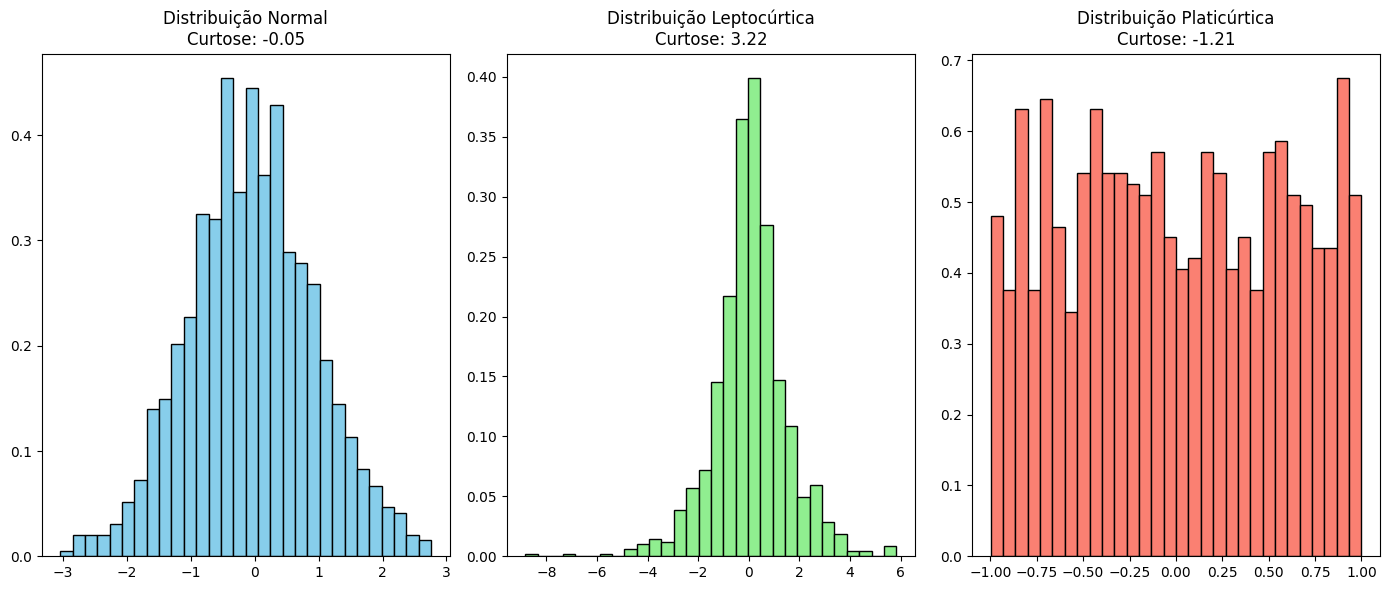

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, norm

# Gerar dados de distribuições normais com diferentes níveis de curtose
np.random.seed(0)
data_normal = np.random.normal(0, 1, 1000)
data_leptokurtic = np.random.laplace(0, 1, 1000)  # Alta curtose (leptocúrtica)
data_platykurtic = np.random.uniform(-1, 1, 1000)  # Baixa curtose (platicúrtica)

# Calcular curtose
kurt_normal = kurtosis(data_normal)
kurt_leptokurtic = kurtosis(data_leptokurtic)
kurt_platykurtic = kurtosis(data_platykurtic)

# Plotar os gráficos
plt.figure(figsize=(14, 6))

# Gráfico da distribuição normal
plt.subplot(1, 3, 1)
plt.hist(data_normal, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title(f'Distribuição Normal\nCurtose: {kurt_normal:.2f}')

# Gráfico da distribuição leptocúrtica
plt.subplot(1, 3, 2)
plt.hist(data_leptokurtic, bins=30, color='lightgreen', edgecolor='black', density=True)
plt.title(f'Distribuição Leptocúrtica\nCurtose: {kurt_leptokurtic:.2f}')

# Gráfico da distribuição platicúrtica
plt.subplot(1, 3, 3)
plt.hist(data_platykurtic, bins=30, color='salmon', edgecolor='black', density=True)
plt.title(f'Distribuição Platicúrtica\nCurtose: {kurt_platykurtic:.2f}')

plt.tight_layout()
plt.show()


## Diferença entre Cursorse e Assimetria
> Curtose se concentra nas caudas da distribuição e indica a presença de valores extremos (outliers). Alta curtose significa caudas mais pesadas e maior propensão a outliers.

> Assimetria se concentra na simetria da distribuição em torno da média. Assimetria positiva ou negativa indica que os dados estão mais concentrados em uma das extremidades da distribuição.

Em resumo, enquanto a curtose nos diz sobre a "altura" e "caudas" da distribuição, a assimetria nos informa sobre a "direção" do viés da distribuição em relação à média.